In [1]:
from src.project_utils import *
import src.segmentation_functions as sf
from src.background_classification import *
from src.classification import *
from src.region_growing import *
import pandas as pd
import matplotlib.pyplot as plt

test_path_ref = '/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/dataset_project_iapr2025/test'
test_images, test_images_ref = load_images(test_path_ref)

df = pd.read_csv('/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/JSP OMG/sample_submission.csv')

L1000757.JPG
L1000758.JPG
L1000759.JPG
L1000760.JPG
L1000761.JPG
L1000762.JPG
L1000764.JPG
L1000766.JPG
L1000767.JPG
L1000769.JPG
L1000770.JPG
L1000773.JPG
L1000774.JPG
L1000775.JPG
L1000776.JPG
L1000777.JPG
L1000778.JPG
L1000781.JPG
L1000782.JPG
L1000783.JPG
L1000784.JPG
L1000786.JPG
L1000789.JPG
L1000790.JPG
L1000794.JPG
L1000795.JPG
L1000796.JPG
L1000798.JPG
L1000800.JPG
L1000801.JPG
L1000806.JPG
L1000807.JPG
L1000809.JPG
L1000811.JPG
L1000813.JPG
L1000814.JPG
L1000816.JPG
L1000818.JPG
L1000819.JPG
L1000822.JPG
L1000823.JPG
L1000824.JPG
L1000825.JPG
L1000829.JPG
L1000830.JPG
L1000832.JPG
L1000833.JPG
L1000834.JPG
L1000835.JPG
L1000837.JPG
L1000839.JPG
L1000840.JPG
L1000841.JPG
L1000842.JPG
L1000845.JPG
L1000846.JPG
L1000847.JPG
L1000848.JPG
L1000852.JPG
L1000853.JPG
L1000856.JPG
L1000857.JPG
L1000858.JPG
L1000861.JPG
L1000862.JPG
L1000863.JPG
L1000864.JPG
L1000867.JPG
L1000869.JPG
L1000871.JPG
L1000873.JPG
L1000874.JPG
L1000877.JPG
L1000878.JPG
L1000879.JPG
L1000881.JPG
L1000883.JPG

In [2]:
import joblib
kmeans = joblib.load("/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/JSP OMG/kmeans_background_model.pkl")

Comtesse
Jelly Black
Jelly Black
Passion au lait
Arabia


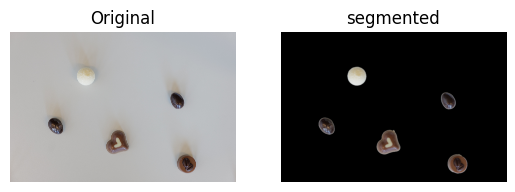

Crème Brulée
Amandina
Comtesse
Jelly White


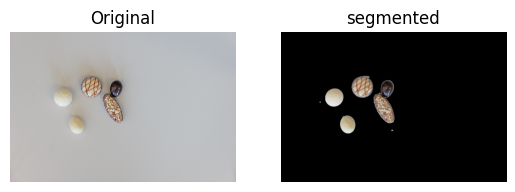

Noir authentique
Jelly Milk
Tentation noir
Crème Brulée
Tentation noir


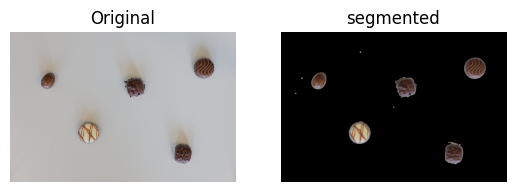

Passion au lait
Noir authentique
Comtesse
Amandina
Triangolo


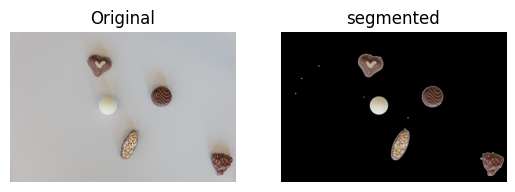

Comtesse
Tentation noir
Arabia
Jelly White


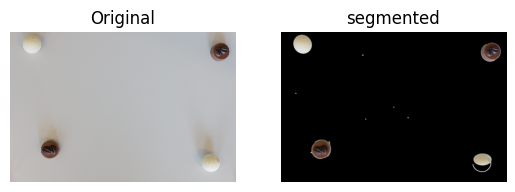

Tentation noir
Crème Brulée
Straciatella
Jelly Milk
Noir authentique
Amandina
Jelly Milk


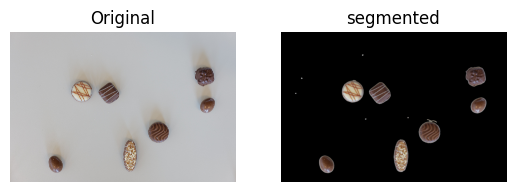

Comtesse
Jelly White
Crème Brulée
Straciatella
Comtesse


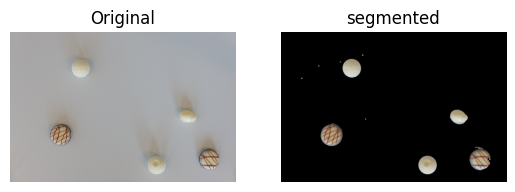

Amandina
Amandina
Tentation noir


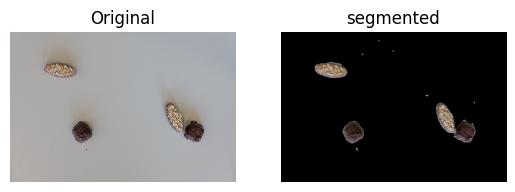

Noir authentique
Noir authentique
Arabia
Arabia


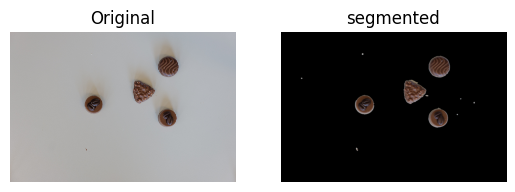

Triangolo
Noblesse


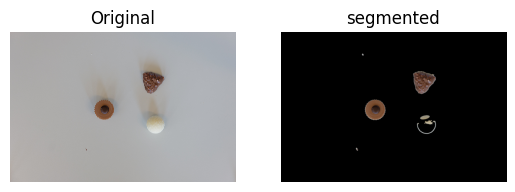

Noir authentique
Passion au lait
Noir authentique
Amandina
Noir authentique


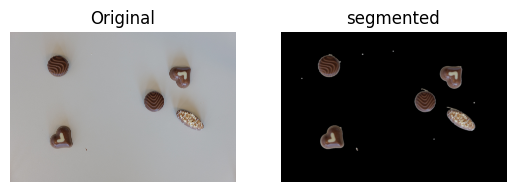

Crème Brulée
Noblesse
Noir authentique
Noir authentique
Amandina


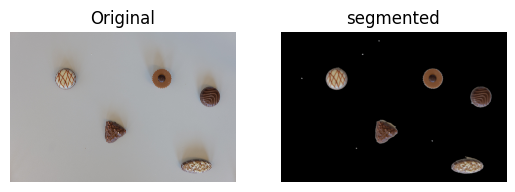

Straciatella
Tentation noir
Amandina
Triangolo
Noir authentique


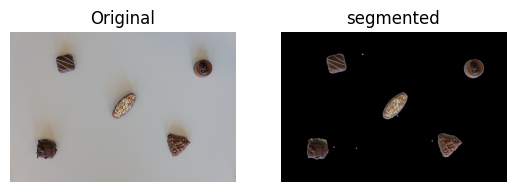

Jelly Black
Comtesse
Triangolo
Triangolo
Comtesse


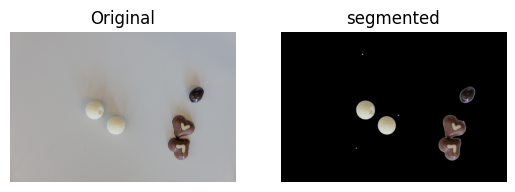

Noir authentique
Noir authentique
Noir authentique
Triangolo
Noblesse
Noir authentique


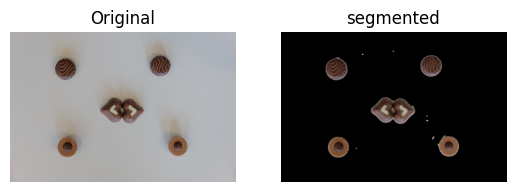

Tentation noir
Straciatella
Jelly Milk
Crème Brulée
Arabia


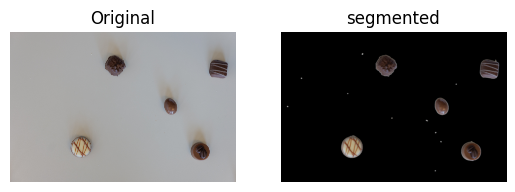

Tentation noir
Triangolo
Jelly White
Tentation noir
Noir authentique
Comtesse


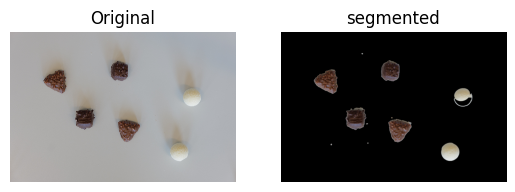

Jelly Milk
Noblesse
Jelly White
Jelly Black
Jelly Black
Jelly White
Arabia


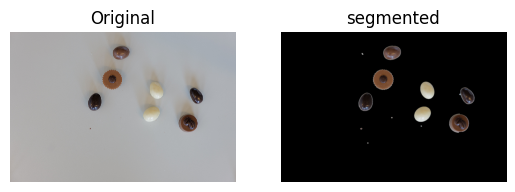

Amandina
Crème Brulée
Noir authentique
Crème Brulée
Noir authentique
Amandina


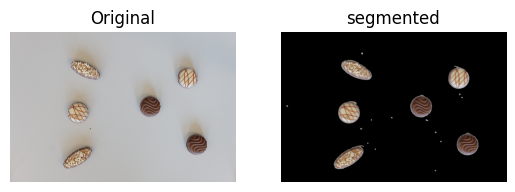

Straciatella
Passion au lait
Tentation noir
Passion au lait
Jelly Milk
Jelly Milk


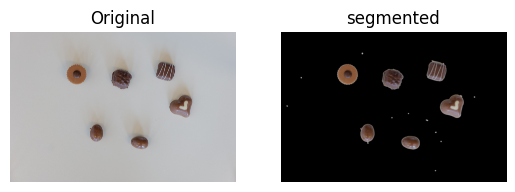

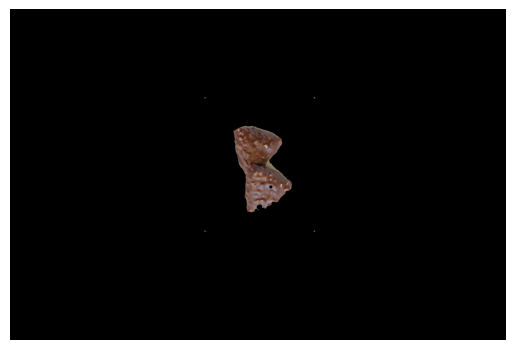

Noir authentique


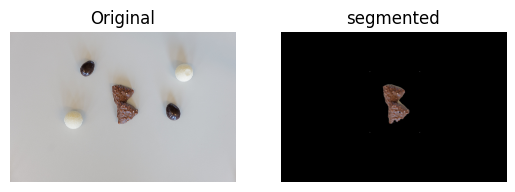

Passion au lait
Arabia
Crème Brulée
Tentation noir
Noblesse


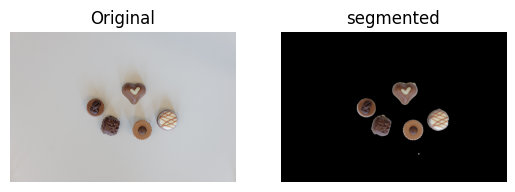

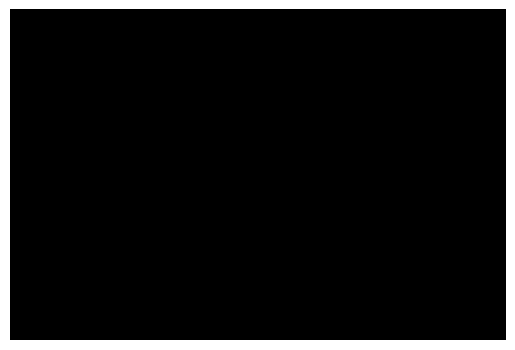

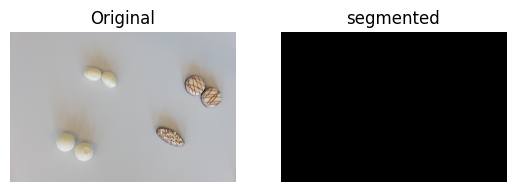

Tentation noir
Noir authentique
Jelly White
Noir authentique
Tentation noir
Jelly Milk


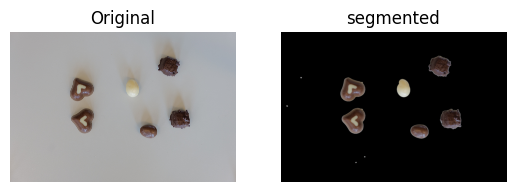

Amandina
Amandina
Arabia
Arabia
Straciatella
Triangolo
Straciatella
Triangolo


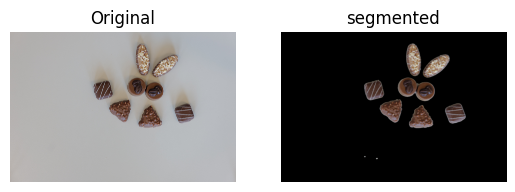

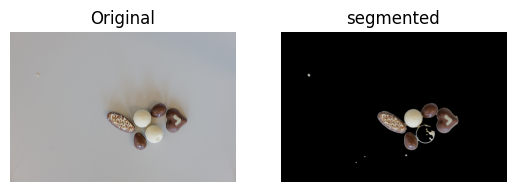

Tentation noir
Jelly Black
Noir authentique
Jelly Black


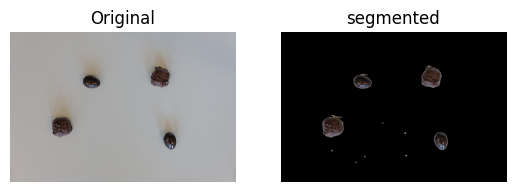

Triangolo
Crème Brulée
Noir authentique
Arabia


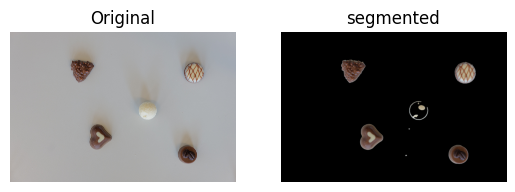

Tentation noir
Amandina
Triangolo
Amandina
Noir authentique
Tentation noir


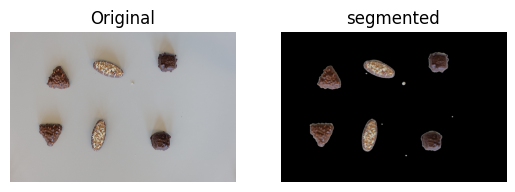

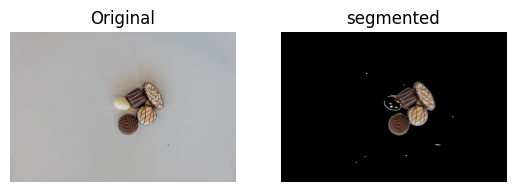

Ignored: Color too close to black boxes or magnets
Jelly White
Comtesse
Arabia
Crème Brulée
Jelly White


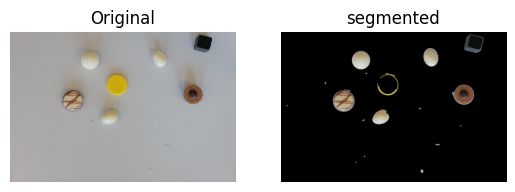

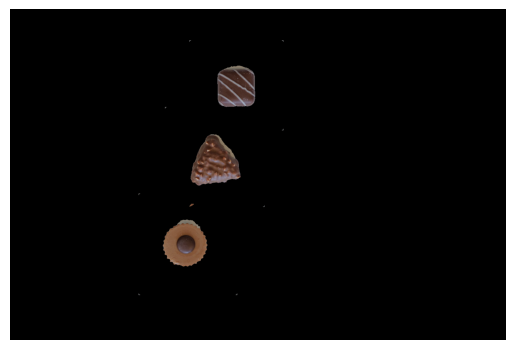

Straciatella
Triangolo
Noblesse


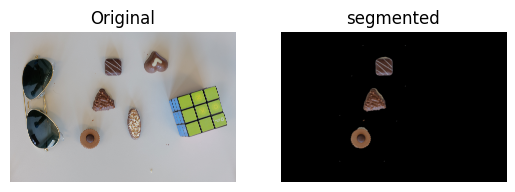

Arabia
Tentation noir
Tentation noir
Tentation noir
Noir authentique
Crème Brulée


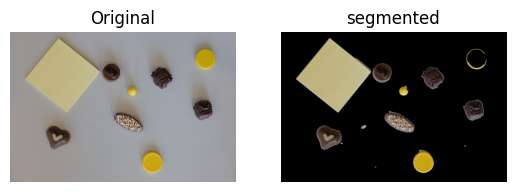

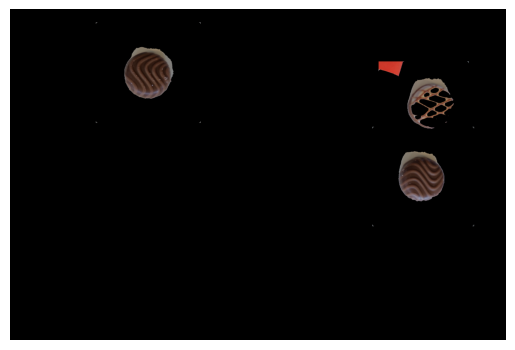

Noir authentique
Jelly Milk
Noir authentique


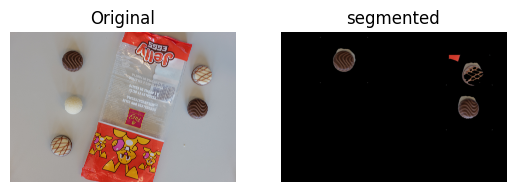

Jelly Milk
Jelly Black
Noblesse
Straciatella
Ignored: Color too close to black boxes or magnets
Ignored: Color too close to black boxes or magnets
Straciatella
Jelly Milk
Noblesse
Jelly Milk


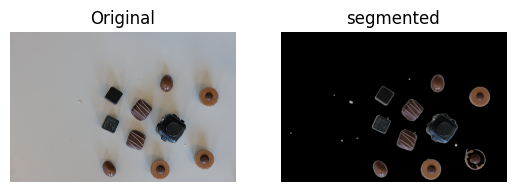

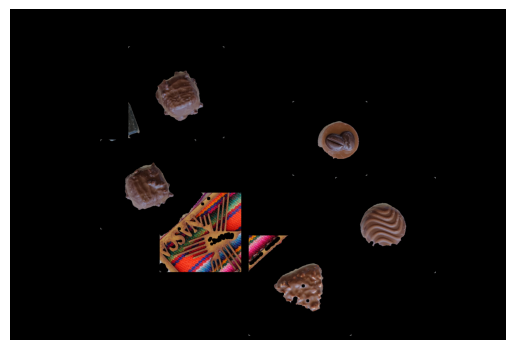

Tentation noir
Tentation noir
Tentation noir
Jelly Milk
Noir authentique
Arabia
Jelly Black
Triangolo


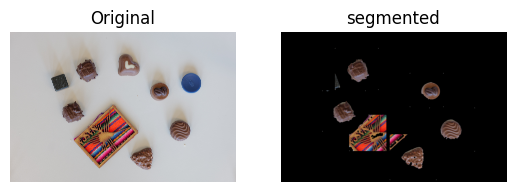

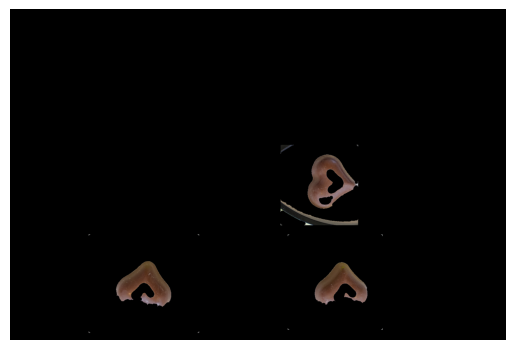

Jelly Milk
Jelly Black
Jelly Milk
Jelly Milk


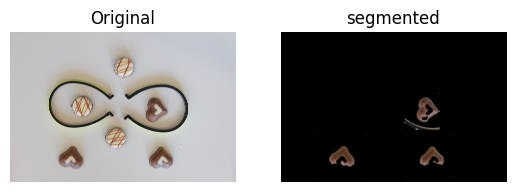

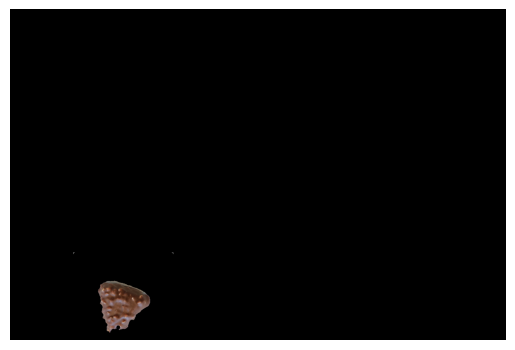

Triangolo


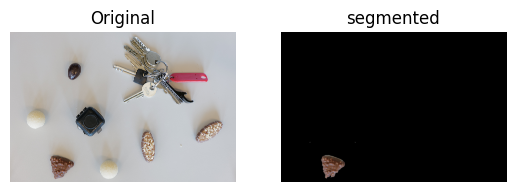

TypeError: mask_outside_regions() missing 1 required positional argument: 'padding'

In [ ]:
for i,image in enumerate(test_images):
    features = load_features(image)
    label = kmeans.predict(features)
    if label == 0:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
        segmented_image = sf.segmentation_clean_background(mask_outside_regions(image,segmented_image, padding = 100))
    elif label == 1:
        segmented_image = sf.segmentation_orange_book(image)
        segmented_image = sf.segmentation_clean_background(mask_outside_regions(image,segmented_image,padding = 10))
    elif label == 2:
        segmented_image = sf.segmentation_clean_background(image)
    elif label == 3:
        segmented_image = sf.segmentation_background_stylo(image)
        segmented_image = sf.segmentation_clean_background(mask_outside_regions(image,segmented_image,padding = 20))
    elif label == 4:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
        segmented_image = sf.segmentation_clean_background(mask_outside_regions(image,segmented_image,padding = 100))
    elif label == 5:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
        segmented_image = sf.segmentation_clean_background(mask_outside_regions(image,segmented_image, padding = 100))

         
    

    image_ref = int(test_images_ref[i])
    row = classification(segmented_image)
    row = np.insert(row,0,image_ref)
    df.loc[df.id == image_ref,:] = row
    show_comparison(image,segmented_image)

df.set_index('id').to_csv('submission_final.csv')